In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
td=ad=pd.read_excel(r'C:\Users\ERIA\OneDrive\THE FORAGE\KPMG\KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='Transactions',skiprows=1)
ad=pd.read_excel(r'C:\Users\ERIA\OneDrive\THE FORAGE\KPMG\KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerAddress',skiprows=1)
cd=pd.read_excel(r'C:\Users\ERIA\OneDrive\THE FORAGE\KPMG\KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic',skiprows=1)

C:\Users\ERIA\AppData\Local\Temp/ipykernel_3160/1440462824.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  cd=pd.read_excel(r'C:\Users\ERIA\OneDrive\THE FORAGE\KPMG\KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic',skiprows=1)


In [3]:
td['transaction_date'].describe()

C:\Users\ERIA\AppData\Local\Temp/ipykernel_3160/1178658489.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  td['transaction_date'].describe()


count                   20000
unique                    364
top       2017-02-14 00:00:00
freq                       82
first     2017-01-01 00:00:00
last      2017-12-30 00:00:00
Name: transaction_date, dtype: object

In [4]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [5]:
#drop names fields
cd.drop(columns=['first_name','last_name'],inplace=True)
cd.shape

(4000, 11)

In [6]:
cd.dropna(subset=['DOB',],inplace=True)
cd.drop(columns=['default'],inplace=True)

In [7]:
cd.shape

(3913, 10)

In [8]:
#remove deceased
cd=cd[cd['deceased_indicator']=='N']

In [9]:
cd.shape

(3911, 10)

In [10]:
#merge demographic and address data 
data=pd.merge(cd,ad, how='left')
data.shape

(3911, 15)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3911 entries, 0 to 3910
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3911 non-null   int64         
 1   gender                               3911 non-null   object        
 2   past_3_years_bike_related_purchases  3911 non-null   int64         
 3   DOB                                  3911 non-null   datetime64[ns]
 4   job_title                            3414 non-null   object        
 5   job_industry_category                3255 non-null   object        
 6   wealth_segment                       3911 non-null   object        
 7   deceased_indicator                   3911 non-null   object        
 8   owns_car                             3911 non-null   object        
 9   tenure                               3911 non-null   float64       
 10  address     

In [12]:
data.isna().sum()

customer_id                              0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              497
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  4
postcode                                 4
state                                    4
country                                  4
property_valuation                       4
dtype: int64

In [13]:
data.drop(columns=['address','country'], inplace=True)
data.shape

(3911, 13)

In [14]:
#mitigating inconsistencies in gender field
chg=['Femal','F']
m=['M']
u=['U']
data['gender'].replace(to_replace=chg,value='Female', inplace=True)
data['gender'].replace(to_replace=m,value='Male', inplace=True)
data['gender'].replace(to_replace=u,value='Unspecified', inplace=True)
data['gender'].value_counts()
data['gender'].value_counts()

Female         2038
Male           1872
Unspecified       1
Name: gender, dtype: int64

In [15]:
data.dropna(subset=['state'],inplace=True)

In [16]:
data.shape

(3907, 13)

In [17]:
data['DOB'].describe()

C:\Users\ERIA\AppData\Local\Temp/ipykernel_3160/3780420313.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['DOB'].describe()


count                    3907
unique                   3442
top       1978-01-30 00:00:00
freq                        7
first     1843-12-21 00:00:00
last      2002-03-11 00:00:00
Name: DOB, dtype: object

In [18]:
#replacing 1843 with 1943
data['DOB'].replace('1843-12-21 00:00:00','1943-12-21 00:00:00', inplace=True)

In [19]:
#creating age column
data['YOB']=pd.DatetimeIndex(data['DOB']).year
data.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,property_valuation,YOB
0,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,2016.0,New South Wales,10.0,1953
1,2,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,2153.0,New South Wales,10.0,1980
3,4,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,4211.0,QLD,9.0,1961
4,5,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,2448.0,New South Wales,4.0,1977
5,6,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,3216.0,VIC,9.0,1966


In [20]:
data['AGE']=2018-data['YOB']
data.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,property_valuation,YOB,AGE
0,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,2016.0,New South Wales,10.0,1953,65
1,2,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,2153.0,New South Wales,10.0,1980,38
3,4,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,4211.0,QLD,9.0,1961,57
4,5,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,2448.0,New South Wales,4.0,1977,41
5,6,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,3216.0,VIC,9.0,1966,52


In [21]:
data.drop(columns=['YOB'],inplace=True)

In [22]:
data['AGE'].describe()

count    3907.000000
mean       40.934988
std        12.621103
min        16.000000
25%        31.000000
50%        41.000000
75%        50.000000
max        87.000000
Name: AGE, dtype: float64

In [23]:
#creating groups by binning
bins=np.linspace(min(data['AGE']),max(data['AGE']),5)

In [24]:
bins

array([16.  , 33.75, 51.5 , 69.25, 87.  ])

In [25]:
group_names=['youths','middle age','seniors','elderly']
data['Age_bin']=pd.cut(data['AGE'],bins,labels=group_names,include_lowest=True)
data['Age_bin'].value_counts() 

middle age    1823
youths        1188
seniors        890
elderly          6
Name: Age_bin, dtype: int64

In [26]:
data[data['Age_bin']=='elderly'].describe()

,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,AGE
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,1387.833333,56.666667,12.000000,2920.666667,8.000000,78.666667
std,1268.003536,23.070905,6.418723,767.627166,2.607681,5.240865
min,34.000000,27.000000,5.000000,2026.000000,3.000000,74.000000
25%,673.500000,42.500000,6.500000,2293.000000,8.000000,75.000000
50%,906.000000,57.500000,12.000000,3053.500000,8.500000,76.500000
75%,2082.750000,65.000000,16.750000,3273.250000,9.750000,81.750000
max,3410.000000,93.000000,20.000000,4005.000000,10.000000,87.000000


In [27]:
data[data['Age_bin']=='youths'].describe()

,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,AGE
count,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000
mean,2009.351010,49.612795,7.069024,3011.637205,7.470539,25.676768
std,1142.599808,28.778325,5.744954,865.207039,2.837641,4.879498
min,12.000000,0.000000,1.000000,2009.000000,1.000000,16.000000
25%,1057.250000,25.000000,2.000000,2200.000000,6.000000,22.000000
50%,1976.000000,50.000000,5.000000,2768.000000,8.000000,26.000000
75%,3027.000000,74.000000,10.000000,3810.000000,10.000000,30.000000
max,4000.000000,99.000000,22.000000,4883.000000,12.000000,33.000000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3907 entries, 0 to 3910
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3907 non-null   int64         
 1   gender                               3907 non-null   object        
 2   past_3_years_bike_related_purchases  3907 non-null   int64         
 3   DOB                                  3907 non-null   datetime64[ns]
 4   job_title                            3412 non-null   object        
 5   job_industry_category                3252 non-null   object        
 6   wealth_segment                       3907 non-null   object        
 7   deceased_indicator                   3907 non-null   object        
 8   owns_car                             3907 non-null   object        
 9   tenure                               3907 non-null   float64       
 10  postcode    

In [29]:
data['state'].value_counts()

NSW                2003
VIC                 918
QLD                 822
New South Wales      85
Victoria             79
Name: state, dtype: int64

In [30]:
#fixing inconsistencies in state values
data.replace(to_replace=['New South Wales'],value='NSW', inplace=True)
data.replace(to_replace=['Victoria'],value='VIC', inplace=True)
data['state'].value_counts()

NSW    2088
VIC     997
QLD     822
Name: state, dtype: int64

In [33]:
data.shape

(3907, 15)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3907 entries, 0 to 3910
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3907 non-null   int64         
 1   gender                               3907 non-null   object        
 2   past_3_years_bike_related_purchases  3907 non-null   int64         
 3   DOB                                  3907 non-null   datetime64[ns]
 4   job_title                            3412 non-null   object        
 5   job_industry_category                3252 non-null   object        
 6   wealth_segment                       3907 non-null   object        
 7   deceased_indicator                   3907 non-null   object        
 8   owns_car                             3907 non-null   object        
 9   tenure                               3907 non-null   float64       
 10  postcode    

In [38]:
data['gender'].value_counts()

Female         2036
Male           1870
Unspecified       1
Name: gender, dtype: int64

Text(0.5, 1.0, 'gender distribution')

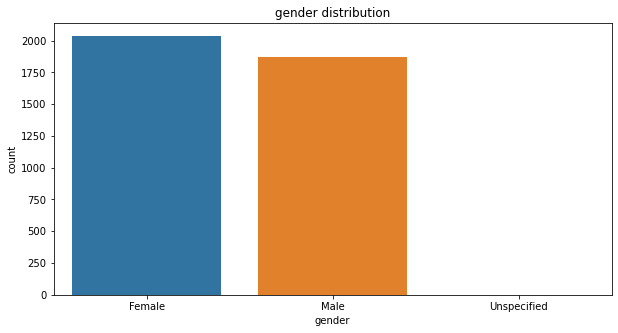

In [39]:
#gender distribution 
plt.figure(figsize=(10,5))
sns.countplot(x=data['gender'])
plt.title('gender distribution')

In [36]:
#gender by last 3 years bike_purchases
a=data.groupby('gender').agg({'past_3_years_bike_related_purchases':sum})
a

,past_3_years_bike_related_purchases
gender,
Female,98149
Male,93288
Unspecified,59


Text(0.5, 1.0, 'past_3_years_bike_related_purchases by gender')

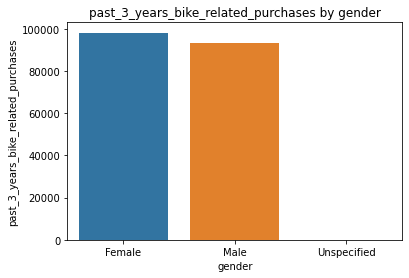

In [40]:
sns.barplot(x=a.index,y=a['past_3_years_bike_related_purchases'])
plt.title('past_3_years_bike_related_purchases by gender')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3907 entries, 0 to 3910
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3907 non-null   int64         
 1   gender                               3907 non-null   object        
 2   past_3_years_bike_related_purchases  3907 non-null   int64         
 3   DOB                                  3907 non-null   datetime64[ns]
 4   job_title                            3412 non-null   object        
 5   job_industry_category                3252 non-null   object        
 6   wealth_segment                       3907 non-null   object        
 7   deceased_indicator                   3907 non-null   object        
 8   owns_car                             3907 non-null   object        
 9   tenure                               3907 non-null   float64       
 10  postcode    

In [47]:
b=data.groupby('job_industry_category').agg({'past_3_years_bike_related_purchases':sum})
b

,past_3_years_bike_related_purchases
job_industry_category,
Argiculture,5945
Entertainment,6320
Financial Services,37115
Health,29774
IT,7411
Manufacturing,39121
Property,13233
Retail,17210
Telecommunications,3244


In [64]:
data['job_industry_category'].value_counts()

Manufacturing         796
Financial Services    766
Health                595
Retail                357
Property              266
IT                    151
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

Text(0.5, 1.0, 'past_3_years_bike_related_purchases by job industry')

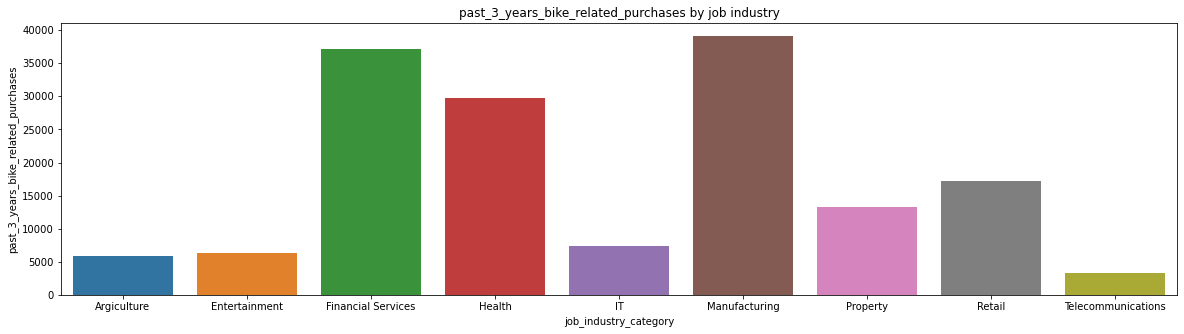

In [48]:
plt.figure(figsize=(20,5))
sns.barplot(x=b.index ,y=b['past_3_years_bike_related_purchases'])
plt.title('past_3_years_bike_related_purchases by job industry')

In [50]:
c=data.groupby('wealth_segment').agg({'past_3_years_bike_related_purchases':sum})
c

,past_3_years_bike_related_purchases
wealth_segment,
Affluent Customer,47115
High Net Worth,47270
Mass Customer,97111


In [65]:
data['wealth_segment'].value_counts()

Mass Customer        1950
High Net Worth        995
Affluent Customer     962
Name: wealth_segment, dtype: int64

Text(0.5, 1.0, 'past_3_years_bike_related_purchases by wealth_segment')

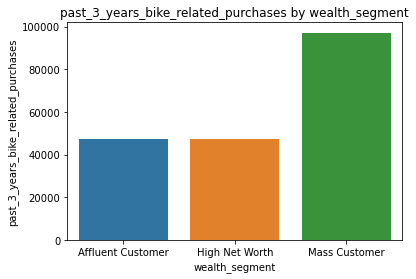

In [51]:
sns.barplot(x=c.index,y=c['past_3_years_bike_related_purchases'])
plt.title('past_3_years_bike_related_purchases by wealth_segment')

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3907 entries, 0 to 3910
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3907 non-null   int64         
 1   gender                               3907 non-null   object        
 2   past_3_years_bike_related_purchases  3907 non-null   int64         
 3   DOB                                  3907 non-null   datetime64[ns]
 4   job_title                            3412 non-null   object        
 5   job_industry_category                3252 non-null   object        
 6   wealth_segment                       3907 non-null   object        
 7   deceased_indicator                   3907 non-null   object        
 8   owns_car                             3907 non-null   object        
 9   tenure                               3907 non-null   float64       
 10  postcode    

In [53]:
#bike purchases by car ownership
d=data.groupby('owns_car').agg({'past_3_years_bike_related_purchases':sum})
d

,past_3_years_bike_related_purchases
owns_car,
No,95667
Yes,95829


In [63]:
data['owns_car'].value_counts()

Yes    1969
No     1938
Name: owns_car, dtype: int64

In [55]:
data['tenure'].describe()

count    3907.000000
mean       10.657538
std         5.659429
min         1.000000
25%         6.000000
50%        11.000000
75%        15.000000
max        22.000000
Name: tenure, dtype: float64

In [56]:
e=data.groupby('tenure').agg({'past_3_years_bike_related_purchases':sum})
e

,past_3_years_bike_related_purchases
tenure,
1.0,8638
2.0,7417
3.0,8516
4.0,8580
5.0,10611
6.0,9414
7.0,11640
8.0,9920
9.0,9538


Text(0.5, 1.0, 'past_3_years_bike_related_purchases by tenure')

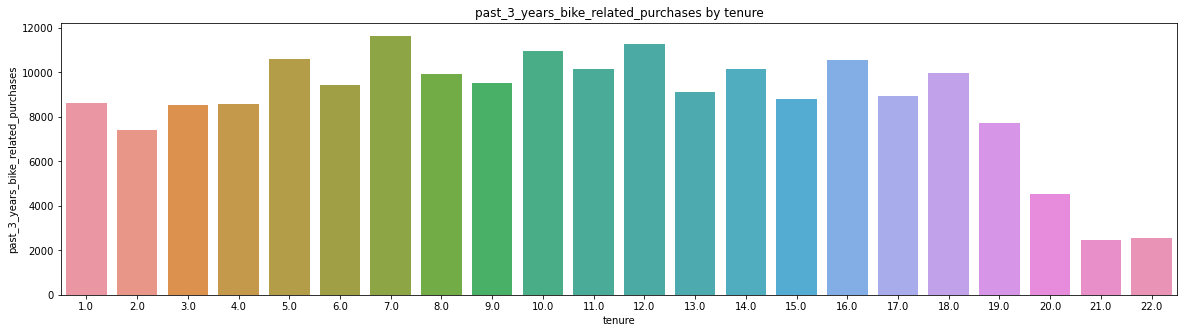

In [58]:
plt.figure(figsize=(20,5))
sns.barplot(x=e.index,y=e['past_3_years_bike_related_purchases'])
plt.title('past_3_years_bike_related_purchases by tenure')

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3907 entries, 0 to 3910
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3907 non-null   int64         
 1   gender                               3907 non-null   object        
 2   past_3_years_bike_related_purchases  3907 non-null   int64         
 3   DOB                                  3907 non-null   datetime64[ns]
 4   job_title                            3412 non-null   object        
 5   job_industry_category                3252 non-null   object        
 6   wealth_segment                       3907 non-null   object        
 7   deceased_indicator                   3907 non-null   object        
 8   owns_car                             3907 non-null   object        
 9   tenure                               3907 non-null   float64       
 10  postcode    

In [60]:
f=data.groupby('state').agg({'past_3_years_bike_related_purchases':sum})
f

,past_3_years_bike_related_purchases
state,
NSW,102543
QLD,40609
VIC,48344


Text(0.5, 1.0, 'past_3_years_bike_related_purchases by state')

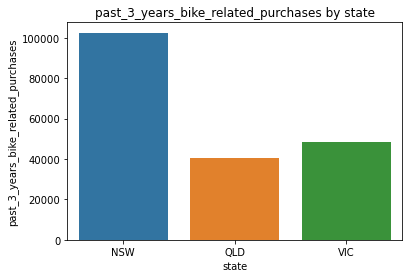

In [61]:
sns.barplot(x=f.index, y=f['past_3_years_bike_related_purchases'])
plt.title('past_3_years_bike_related_purchases by state')

In [62]:
data['state'].value_counts() 

NSW    2088
VIC     997
QLD     822
Name: state, dtype: int64

In [66]:
g=data.groupby('Age_bin').agg({'past_3_years_bike_related_purchases':sum})
g

,past_3_years_bike_related_purchases
Age_bin,
youths,58940
middle age,89921
seniors,42295
elderly,340


In [67]:
data['Age_bin'].value_counts()

middle age    1823
youths        1188
seniors        890
elderly          6
Name: Age_bin, dtype: int64

Text(0.5, 1.0, 'past_3_years_bike_related_purchases by age groups')

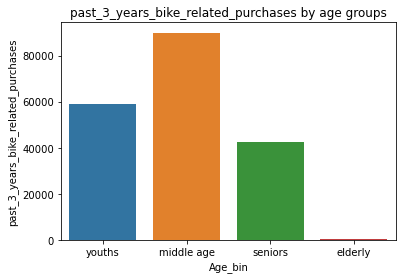

In [68]:
sns.barplot(x=g.index,y=g['past_3_years_bike_related_purchases'])
plt.title('past_3_years_bike_related_purchases by age groups')

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3907 entries, 0 to 3910
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3907 non-null   int64         
 1   gender                               3907 non-null   object        
 2   past_3_years_bike_related_purchases  3907 non-null   int64         
 3   DOB                                  3907 non-null   datetime64[ns]
 4   job_title                            3412 non-null   object        
 5   job_industry_category                3252 non-null   object        
 6   wealth_segment                       3907 non-null   object        
 7   deceased_indicator                   3907 non-null   object        
 8   owns_car                             3907 non-null   object        
 9   tenure                               3907 non-null   float64       
 10  postcode    